### 철새 수 가설검정 과정

철새가 자주 나타나는 월-1월,2월,3월,10월,11월,12월

철새가 자주 나타나지 않는 월-4월,5월,6월,7월,8월,9월


가정: 철새가 자주 나타나는 월과 철새가 자주 나타나지 않는 월의 발생건수 차이가 있을 것이다.

귀무가설: 철새가 나타나는 월의 발생건수와 철새가 나타나지 않는 월의 발생건수 차이는 0이다.

대립가설: 철새가 나타나는 월의 발생건수와 철새가 나타나지 않는 월의 발생건수 차이는 0이 아니다.

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
#2015년~2020년 웝 별 발생건수 데이터 파일

brids_count=pd.read_csv("년월_발생건수.csv", encoding='utf-8-sig')

In [3]:
#월 별로 발생건수 평균값 데이터프레임 생성
brids_count=brids_count.groupby(['month'])['발생일'].mean()
brids_count=brids_count.to_frame()
brids_count.head()

,발생일
month,
1,25.000000
2,16.666667
3,15.750000
4,5.666667
5,6.000000


In [4]:
brids_count
#7,8월은 발생건수 0건 .

,발생일
month,
1,25.000000
2,16.666667
3,15.750000
4,5.666667
5,6.000000
6,19.000000
9,7.000000
10,7.000000
11,18.000000


In [5]:
#7월, 8월 전 월 평균으로 대체하는 코드
brids_count.loc[7,'발생일']=0
brids_count.loc[8,'발생일']=0
brids_count.loc[7,'발생일']=(brids_count.loc[5,'발생일']+brids_count.loc[6,'발생일'])/2
brids_count.loc[8,'발생일']=(brids_count.loc[6,'발생일']+brids_count.loc[7,'발생일'])/2
brids_count

,발생일
month,
1,25.000000
2,16.666667
3,15.750000
4,5.666667
5,6.000000
6,19.000000
9,7.000000
10,7.000000
11,18.000000


#### 7월,8월은 발생건수 0건. 
#### 7월은 5,6월의 평균값으로 대체 / 8월은 6,7월의 평균값으로 대체

In [6]:
#철새가 나타나는 월 추출 (발생건수 최솟값 3월과 10월 제외한 1~2월, 11월~12월)
brids_count_1=brids_count.loc[1:3]
print(brids_count_1)
brids_count_10=brids_count.loc[10:12]
print(brids_count_10)

             발생일
month           
1      25.000000
2      16.666667
3      15.750000
             발생일
month           
10      7.000000
11     18.000000
12     98.333333


In [7]:
#철새가 나타나는 월(발생건수 평균값)데이터 프레임 생성

brids_count_oc=pd.concat([brids_count_1,brids_count_10],axis = 0)
print(brids_count_oc)

#내림차순 정렬
brids_count_oc=brids_count_oc.sort_values(by="발생일", ascending=True)
brids_count_oc

             발생일
month           
1      25.000000
2      16.666667
3      15.750000
10      7.000000
11     18.000000
12     98.333333


,발생일
month,
10,7.000000
3,15.750000
2,16.666667
11,18.000000
1,25.000000
12,98.333333


In [8]:
#철새가 자주 나타나지 않는 월 추출 (4~9월)
brids_count_4=brids_count.loc[4:9]
print(brids_count_4)
brids_count_7=brids_count.loc[7:8]
print(brids_count_4)

#brids_count_6=brids_count.loc[6:9]
#print(brids_count_6)

             발생일
month           
4       5.666667
5       6.000000
6      19.000000
9       7.000000
             발생일
month           
4       5.666667
5       6.000000
6      19.000000
9       7.000000


In [9]:
#철새가 자주 나타나지 않는 월(발생건수 평균값)데이터 프레임 생성

brids_count_nc=pd.concat([brids_count_4,brids_count_7],axis = 0)
brids_count_nc

#내림차순 정렬
brids_count_nc=brids_count_nc.sort_values(by="발생일", ascending=True)
brids_count_nc

,발생일
month,
4,5.666667
5,6.000000
9,7.000000
7,12.500000
8,15.750000
6,19.000000


가정: 철새가 나타나는 월과 철새가 나타나지 않는 월보다 발생건수 차이가 있을 것이다.

귀무가설: 철새가 나타나는 월의 발생건수와 철새가 나타나지 않는 월의 발생건수 평균은 0이다.

대립가설: 철새가 나타나는 월의 발생건수와 철새가 나타나지 않는 월의 발생건수 평균은 0이 아니다.

In [10]:
# 정규성 검정 특정 수치 미만이면 정규성을 따른다고 판단.
test_stat, p_value = stats.shapiro(brids_count_oc)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))
test_stat, p_value = stats.shapiro(brids_count_nc)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value))

test_stat: 0.656684, pvalue=0.002092
test_stat: 0.879138, pvalue=0.265124


In [11]:
#Levene의 등분산 검정 2표본 T test  0.05보다 크면 두 표본의 분산이 같다.
stats.levene(brids_count_oc.발생일,brids_count_nc.발생일)

LeveneResult(statistic=0.8909436225049784, pvalue=0.3674677595103576)

In [12]:
#독립 표본 t-검정 등분산성 0.05이상이면 equal_var=True

t_stat, p_val=stats.ttest_ind(brids_count_oc.발생일,brids_count_nc.발생일,equal_var=True)
print("t-statistics : {}, p-value : {}".format(t_stat, p_val))

t-statistics : 1.3639994704342853, p-value : 0.20247890878591698


In [13]:
#표본크기 4개 (6개 이하는 불가피하게 비모수적 방법 사용) 
# mannwhitneyu 검정
result_brids=sp.stats.mannwhitneyu(brids_count_oc.발생일,brids_count_nc.발생일)
result_brids

MannwhitneyuResult(statistic=7.0, pvalue=0.04577712072791625)

In [14]:
print("u검정 통계량: %.3f, pvalue=%.3f"%(result_brids))

u검정 통계량: 7.000, pvalue=0.046


## 철새 수 선형회귀식

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [22]:
brids_occur=pd.read_csv("철새수_년도월_발생건수.csv", encoding='utf-8-sig')
brids_occur

,year,month,철새수,발생건수
0,2015,1,1072942,38.0
1,2015,2,777717,35.0
2,2015,3,1212369,29.0
3,2015,10,529192,7.0
4,2015,11,870346,3.0
5,2015,12,1944040,0.0
6,2016,1,1742589,0.0
7,2016,2,1029590,0.0
8,2016,3,515353,1.0
9,2016,10,542767,0.0


In [23]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [25]:
outlier_idx = get_outlier(df=brids_occur, column='철새수', weight=1.5)
brids_occur.drop(outlier_idx, axis=0, inplace=True)

In [26]:
brids_occur.head()

,year,month,철새수,발생건수
0,2015,1,1072942,38.0
1,2015,2,777717,35.0
2,2015,3,1212369,29.0
3,2015,10,529192,7.0
4,2015,11,870346,3.0


In [27]:
x=np.reshape(brids_occur['철새수'].values, ((1,)+brids_occur['발생건수'].values.shape))

In [29]:
x=np.expand_dims(brids_occur['철새수'].values, axis=1)
x

array([[1072942],
       [ 777717],
       [1212369],
       [ 529192],
       [ 870346],
       [1944040],
       [1742589],
       [1029590],
       [ 515353],
       [ 542767],
       [ 982244],
       [1343073],
       [1489334],
       [ 996360],
       [ 483984],
       [ 391838],
       [ 627030],
       [1202766],
       [1579306],
       [1093577],
       [ 426978],
       [ 461740],
       [ 780281],
       [1461500],
       [1619361],
       [ 737360],
       [ 398783],
       [ 616639],
       [ 725090],
       [1999044],
       [1837770],
       [ 947178],
       [ 398955],
       [ 583945],
       [1032392],
       [1731813]], dtype=int64)

In [31]:
y=brids_occur['발생건수'].values
y

array([ 38.,  35.,  29.,   7.,   3.,   0.,   0.,   0.,   1.,   0.,  66.,
       247.,  29.,  13.,  29.,   0.,   1.,   7.,   8.,   2.,   4.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,  41.])

In [44]:
xy=pd.concat([x,y],axis=0)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [42]:
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
res=ols('철새수 ~ 발생건수',data=xy).fit()

NameError: name 'xy' is not defined

In [33]:
# C: 철새수 불러오기
D78=pd.read_csv("brids_risktable.csv")
print(D78.head())
C=D78['철새수']
C

   month     시도  발생건수(타겟)      철새수  range   result 철새수/result  표준 risk  risk  \
0      1    강원도         2   626130    2,3   947733        66%        5     3   
1      1    경기도        55  1242626  55,56  1072138       116%        5     5   
2      1   경상남도        11   347682  11,12   968858        36%        5     1   
3      1   경상북도         2   554884    2,3   947733        59%        5     2   
4      1  광주광역시         0    49915    0,1   943038         5%        5     0   

   Unnamed: 9 리스크 기준(이상/미만)   점수  
0         NaN        0%~20%  0.0  
1         NaN       20%~40%  1.0  
2         NaN       40%~60%  2.0  
3         NaN       60%~80%  3.0  
4         NaN      80%~100%  4.0  


0       626130
1      1242626
2       347682
3       554884
4        49915
        ...   
113    2099384
114     965887
115     213369
116    2737777
117     212265
Name: 철새수, Length: 118, dtype: int64

In [36]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

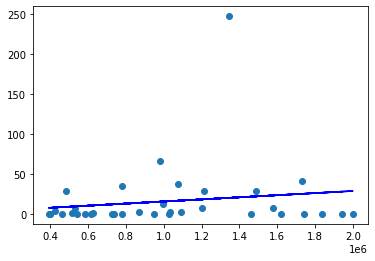

In [37]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=철새수
# y축=발생건수

In [38]:
# C: 철새 수 값 
result=[]
#num=C
for i in C:
    result.append(np.round(regr.predict([[i]]),0))

In [39]:
result

[array([11.]),
 array([19.]),
 array([7.]),
 array([10.]),
 array([3.]),
 array([3.]),
 array([8.]),
 array([4.]),
 array([3.]),
 array([12.]),
 array([5.]),
 array([16.]),
 array([26.]),
 array([6.]),
 array([47.]),
 array([5.]),
 array([8.]),
 array([15.]),
 array([4.]),
 array([7.]),
 array([3.]),
 array([2.]),
 array([7.]),
 array([3.]),
 array([3.]),
 array([7.]),
 array([3.]),
 array([9.]),
 array([12.]),
 array([4.]),
 array([34.]),
 array([4.]),
 array([8.]),
 array([17.]),
 array([3.]),
 array([5.]),
 array([3.]),
 array([2.]),
 array([5.]),
 array([4.]),
 array([3.]),
 array([4.]),
 array([2.]),
 array([5.]),
 array([5.]),
 array([3.]),
 array([18.]),
 array([4.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([

In [40]:
R=result
R

[array([11.]),
 array([19.]),
 array([7.]),
 array([10.]),
 array([3.]),
 array([3.]),
 array([8.]),
 array([4.]),
 array([3.]),
 array([12.]),
 array([5.]),
 array([16.]),
 array([26.]),
 array([6.]),
 array([47.]),
 array([5.]),
 array([8.]),
 array([15.]),
 array([4.]),
 array([7.]),
 array([3.]),
 array([2.]),
 array([7.]),
 array([3.]),
 array([3.]),
 array([7.]),
 array([3.]),
 array([9.]),
 array([12.]),
 array([4.]),
 array([34.]),
 array([4.]),
 array([8.]),
 array([17.]),
 array([3.]),
 array([5.]),
 array([3.]),
 array([2.]),
 array([5.]),
 array([4.]),
 array([3.]),
 array([4.]),
 array([2.]),
 array([5.]),
 array([5.]),
 array([3.]),
 array([18.]),
 array([4.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([

In [41]:
print(regr.coef_, regr.intercept_)

[1.31015594e-05] 2.4421347520418344
